### **Multiple Linear Regression**

In [70]:
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### **Multiple Linear Regression using sklearn**

In [71]:
dataset = load_diabetes(as_frame = True)
df = dataset['data']
df['target'] = dataset['target']

In [72]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


#### 3D Plot using columns - age, s5 and target

In [73]:
# Plotly plot
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=df['age'],
    y=df['s5'],
    z=df['target'],
    mode='markers',
    marker=dict(size=3)
))
fig.show()

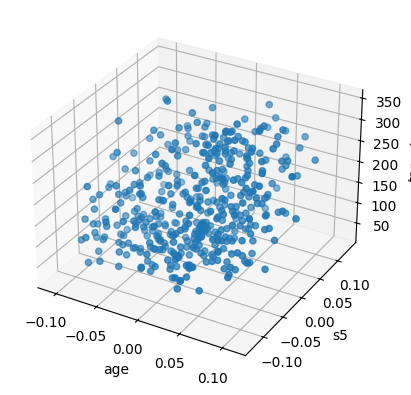

In [74]:
# Matplotlib Plot
fig = plt.figure()
ax = plt.subplot(projection = '3d')

ax.scatter3D(df['age'], df['s5'], df['target'])
ax.set_xlabel('age')
ax.set_ylabel('s5')
ax.set_zlabel('target')

plt.show()

#### Train Test Split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:10], df.iloc[:, -1], test_size = 0.2, random_state =42)

#### Model Training

In [76]:
mlr = LinearRegression()

In [77]:
mlr.fit(X_train, y_train)

LinearRegression()

In [78]:
print(mlr.coef_, mlr.intercept_, sep = '\n')

[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
151.34560453985995


#### Model Prediction and r2_score

In [79]:
y_pred = mlr.predict(X_test)

In [80]:
r2_score(y_test, y_pred)

0.4526027629719196

### **Creating our own Multiple Regression Class**

##### Using Ordinary Least Square Estimator 
- betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)

In [81]:
class multiple_linear_regression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X_train, y_train):
        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0] # 1st value beta°
        self.coef_ = betas[1:] # From 2nd value beta1, beta2 as all

    def predict(self, X_test):
        y_pred = self.intercept_ + np.dot(X_test, self.coef_)
        return y_pred

In [82]:
# Creating object
mlr = multiple_linear_regression()

##### Y_hat  = X * betas 
###### **In the 1st column all are beta°(i.e. intercept), so when you seperate all the betas the 1st column remains 1 thats why inserting 1 as a first column**

In [83]:
temp_X_train = X_train.copy()
temp_X_train.insert(loc = 0, column = 'intercept_', value=np.ones(X_train.shape[0]))


In [84]:
mlr.fit(temp_X_train, y_train)

#### Slopes(beta_1, beta_2 ...) and Intercept(beta°)

In [85]:
mlr.coef_

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

In [86]:
mlr.intercept_

151.34560453985998

#### Model Prediction and r2_score

In [87]:
y_pred = mlr.predict(X_test)

In [88]:
r2_score(y_test, y_pred)

0.45260276297192026

### **Multiple Linear Regression using Gradient Descent**

In [92]:
class GDRegressor:
    def __init__(self, lr, epochs) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.lr = lr
        self.epochs = epochs
    
    def fit(self, X_train, y_train) -> None:
        # Generally the random values of coefs and intercept
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0

        for i in range(self.epochs):
            y_hat = self.intercept_ + np.dot(X_train, self.coef_)

            # Calculating the accurate value of intercept
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)

            # Calculating the accurate value of coeffs_
            coef_der = -2 * np.dot(y_train - y_hat, X_train)
            self.coef_ = self.coef_ - (self.lr * coef_der)
    
    def predict(self, X_test):
        return self.intercept_ + np.dot(X_test, self.coef_)


#### Learning Rate and No. of Epochs are Hyperparameters of Gradient Descent

In [105]:
gdr = GDRegressor(0.01, 350)

In [106]:
gdr.fit(X_train, y_train)

#### Slopes(beta_1, beta_2 ...) and Intercept(beta°)

In [109]:
print(gdr.coef_, gdr.intercept_, sep = '\n')

[  42.38067028 -239.55528117  555.84830669  339.6231593  -105.92752691
 -123.91710529 -213.21827772  150.08105548  417.58943859   65.38903195]
151.16514348368497


#### Model Prediction and r2_score

In [112]:
y_pred = gdr.predict(X_test)

In [114]:
r2_score(y_test, y_pred)

0.45541744099665393